In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from ipywidgets import interact

## Unsicherheiten

In [157]:
u_U = 0.5e3
u_I = 20e-6
u_beta_anleitung = np.deg2rad(0.05)

sheet_names = [
    "NaCl",
    "Zirkoniumfolie",
    "NaCl gedreht",
    "LiF",
    "Variation Ströme bei LiF",
    "Variation Spannung bei LiF",
]

dfs = {}

for sheet_name in sheet_names:
    dfs[sheet_name] = pd.read_excel("XST.xlsx", sheet_name=sheet_name)

## Winkelunsicherheit

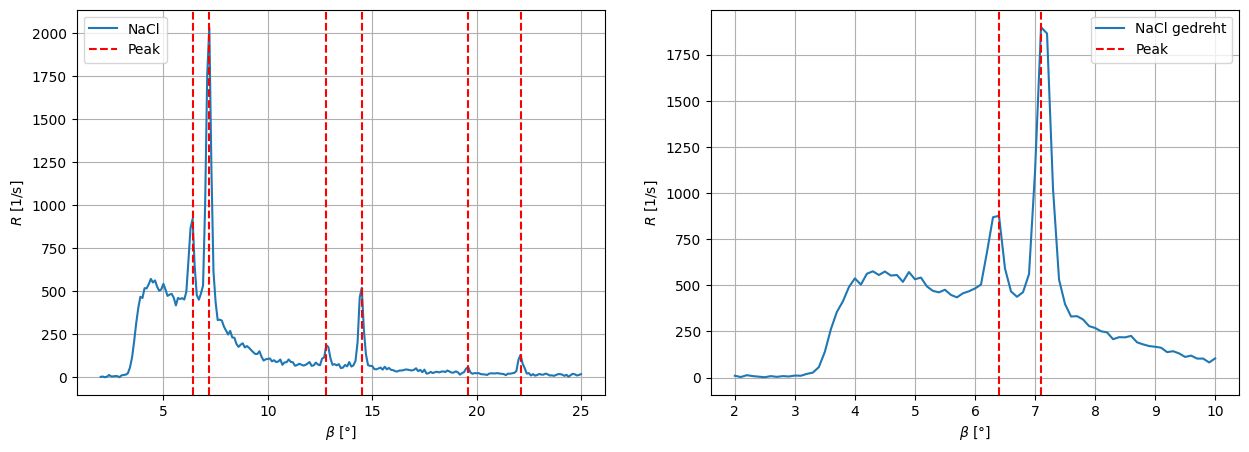

In [158]:
# NaCl Daten
nacl = dfs["NaCl"]
nacl.columns = ["beta", "R"]

# Wiederholungsmessung NaCl
nacl_gedreht = dfs["NaCl gedreht"]
nacl_gedreht.columns = ["beta", "R"]

def idx_to_beta(idx):
    return nacl["beta"][idx]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

nacl.plot(x="beta", y="R", kind="line", grid=True, ax=axs[0])
axs[0].set_xlabel(r"$\beta$ [°]")
axs[0].set_ylabel(r"$R$ [1/s]")
nacl_gedreht.plot(x="beta", y="R", kind="line", grid=True, ax=axs[1])
axs[1].set_xlabel(r"$\beta$ [°]")
axs[1].set_ylabel(r"$R$ [1/s]")

peaks_idcs_nacl = [44, 52, 108, 125, 176, 201]
peaks_idcs_nacl_gedreht = [44, 51]

for peak_idx in peaks_idcs_nacl:
    axs[0].axvline(x=nacl["beta"][peak_idx], color="red", linestyle="--", label="Peak")
for peak_idx in peaks_idcs_nacl_gedreht:
    axs[1].axvline(x=nacl_gedreht["beta"][peak_idx], color="red", linestyle="--", label="Peak")

axs[0].legend(["NaCl", "Peak"])
axs[1].legend(["NaCl gedreht", "Peak"])

In [162]:
nacl_peaks_beta = nacl["beta"][peaks_idcs_nacl].values
nacl_gedreht_peaks_beta = nacl_gedreht["beta"][peaks_idcs_nacl_gedreht].values
diffs = np.abs(nacl_peaks_beta[:2] - nacl_gedreht_peaks_beta)
diffs_rad = np.deg2rad(diffs)

u_beta = np.sqrt(u_beta_anleitung**2 + diffs_rad.max()**2)
print(f"u_beta = {u_beta} rad", " = ", np.rad2deg(u_beta), "°")

u_beta = 0.0019513374252890991 rad  =  0.11180339887498997 °
